# Final Project Title(TBD)

- Nicolas Colebank
- Andrew Consiglio
- Cristina De La Torre

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Abstract

TO DO

# Research Question

Is there a relationship between past extreme weather events such as **[insert specifc weather used]** from 2018-2023 and recent climate opinions from 2023 across states in the United States? Does this relationship vary in regards to state?
<br><br>

We define climate opinion to be based upon the responses of adults to the following questions: 
- Is global warming affecting the weather? 
- Are you worried about global warming?
- Do you support regulating CO2 as a pollutant?
- Should global warming be a priority for the next president and Congress?
- Do you discuss global warming at least occasionally? 

# Background (WIP)

> Why is this problem relevant? Or, what inspired you to investigate this problem?

Global warming and the effects of environmental issues at large remain relevant especially with recent patterns of natural disasters and climate change in the United States. Yet, developing effective ways with which to address the impacts of these issues remain challenging at a national scale. We want to assess this challenge by investigating possible factors that may explain the difficulty in addressing environmental issues across the country. More specifically we will be investigating these factors in relation to local extreme weather events.

 The complexity of this problem may be shaped by polarized public perception and local experiences, and so the factors we will assess will focus on local sentiment and socioeconomic elements. Analyzing sentiment such as beliefs, risk perceptions, policy support, and behaviors at a local level might lead to a richer understanding of diverse opinions. To develop larger contextual comprehension, analyzing trends of local natural disasters and environmental issues like fracking and pollution may be useful along with an investigation of local governments, their policies, and access to resources.
 
It is through an analysis of extreme weather and these factors that we would like to work towards developing effective ways to address the impact of climate change at the federal level. Hence, exploring the relationship between severe weather, public opinion, and socioeconomic disparities is particularly important because it can provide a contextual framework with which to tackle the challenge of developing effective solutions to mitigate the effects of environmental issues. 


# Hypothesis

There exist a relationship between recent climate opinions and extreme weather events such that as the **frequency** of extreme weather events increases so does the **frequency** of negative opinions on climate.

(TO DO Rationale) This is due to previously mentioned study in which __ . 

# Data(WIP)

>Where did you get the data from?<br>
>Description of the data

There are a few datasets that would prove useful for making a statistical analysis to help answer this problem. For one, Yale has a dataset containing climate opinion data in the U.S. down to the county of around 31,000 observations.The dataset contains the responses of respondents that were asked questions across categories of beliefs, risk perceptions, policy support, who shoud act, and behaviors. From this datset, we will only be analyzing responses to one question for each category, as stated in the research question. Additionally, the National Oceanic and Atmospheric Administration (NOAA) has data on extreme weather events throughout the U.S., dating back to 1950. 

Harvard’s county-level dataset on U.S. Senate voting can be used to see how partisan voting influences climate change as well. 

All of these datasets can be downloaded as CSV files. We will use python’s pandas library to merge these datasets together, which can be done by using state name, which when combined will provide an unique identifier. For the dataset on extreme weather events, the data can only be downloaded by type of weather event. We will pick the most common extreme weather events and use these in our main dataset.

<br><br>

## Data Cleaning and Transformation

### Climate Opinion Data

In [2]:
yale_climate = pd.read_csv('data/yale_climate.csv')
yale_climate.head()

,geotype,geoid,geoname,varname,x2010,x2011,x2012,x2013,x2014,x2015,x2016,x2017,x2018,x2019,x2020,x2021,x2022,x2023
0,state,1,Alabama,affectweather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.66,49.22,53.33,53.64,49.63,50.28
1,state,2,Alaska,affectweather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.48,54.94,60.92,62.25,59.17,60.66
2,state,4,Arizona,affectweather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.32,58.40,63.55,64.22,61.73,63.12
3,state,5,Arkansas,affectweather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.17,50.78,55.72,55.89,51.26,52.43
4,state,6,California,affectweather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.21,64.51,69.28,70.14,67.47,68.39


In [3]:
# yale_climate.varname.unique()
# keep = [
#     'affectweather',
#     'affectweatherOppose',
#     'worried', 
#     'worriedOppose',
#     'regulate', 
#     'regulateOpposed',
#     'priority', 
#     'priorityOpposed',
#     'discuss',
#     'discussedOpposed'
# ]
#what varname goes with what question?

In [4]:
yale_climate = yale_climate[yale_climate['geotype'] == 'state']
yale_climate = yale_climate[['geoname','varname', 'x2018', 'x2019', 'x2020', 'x2021', 'x2022', 'x2023']]

#consistent state names across both datasets
yale_climate['geoname'] = yale_climate['geoname'].str.upper() 
yale_climate.head()

,geoname,varname,x2018,x2019,x2020,x2021,x2022,x2023
0,ALABAMA,affectweather,52.66,49.22,53.33,53.64,49.63,50.28
1,ALASKA,affectweather,57.48,54.94,60.92,62.25,59.17,60.66
2,ARIZONA,affectweather,60.32,58.40,63.55,64.22,61.73,63.12
3,ARKANSAS,affectweather,53.17,50.78,55.72,55.89,51.26,52.43
4,CALIFORNIA,affectweather,67.21,64.51,69.28,70.14,67.47,68.39


In [5]:
melted = pd.melt(yale_climate, id_vars=['geoname', 'varname'], var_name='year', value_name='percentage')
melted['year'] = melted['year'].str.replace('x','').astype(int)
yale_climate = melted
yale_climate.head()

,geoname,varname,year,percentage
0,ALABAMA,affectweather,2018,52.66
1,ALASKA,affectweather,2018,57.48
2,ARIZONA,affectweather,2018,60.32
3,ARKANSAS,affectweather,2018,53.17
4,CALIFORNIA,affectweather,2018,67.21


---

### Storm Data

In [6]:
df = pd.read_csv('data/storm_dataset2023.csv')
df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202310,25,230,202310,27,551,186682,1145781,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Public reports 7.5 inches at Black Tiger Bay C...,CSV
1,202310,25,230,202310,27,1437,186682,1145783,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Local Police Department relays storm total sno...,CSV
2,202310,25,230,202310,27,1126,186682,1145784,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Public reports 10 inches of storm total snowfa...,CSV
3,202310,25,230,202310,27,1301,186682,1145796,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Emergency Manager reports 6 inches of storm to...,CSV
4,202310,25,230,202310,27,600,186682,1145884,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",CoCoRaHS Station ND-GF-23 reports 8.8 inches o...,CSV


In [7]:
#there are multiple events for the same episode, this removes them
unique = df.drop_duplicates(subset=['STATE_FIPS', 'EPISODE_ID']) 
agg_funcs = {
    'EVENT_ID': 'count',
    'YEAR': 'first',
}

by_state = unique.groupby('STATE').agg(agg_funcs).reset_index()
by_state = by_state.rename({'EVENT_ID': 'COUNT'}, axis=1)

#only columns we might use
events = unique[['STATE', 'EVENT_TYPE', 'YEAR', 'EPISODE_ID', 'EPISODE_NARRATIVE']] 
events

,STATE,EVENT_TYPE,YEAR,EPISODE_ID,EPISODE_NARRATIVE
0,NORTH DAKOTA,Heavy Snow,2023,186682,"In late October, a winter storm dumped heavy s..."
6,MISSISSIPPI,Thunderstorm Wind,2023,180848,"In the afternoon and evening of the 24th, clus..."
7,MINNESOTA,Drought,2023,186724,D2 Drought continued from September into early...
9,ILLINOIS,Thunderstorm Wind,2023,184619,A vigorous short-wave trough interacted with a...
11,VIRGINIA,Thunderstorm Wind,2023,185704,Scattered severe thunderstorms in advance of a...
...,...,...,...,...,...
74851,TEXAS,Thunderstorm Wind,2023,186385,Thunderstorms developed along a cold front as ...
74858,NEW HAMPSHIRE,Flash Flood,2023,184741,An area of low pressure moved northeast from M...
74863,TEXAS,Wildfire,2023,185514,"While weather conditions were pretty tame, we ..."
74864,TEXAS,Wildfire,2023,185515,Hot conditions continued for the eastern Panha...


In [8]:
event_dfs = []
by_state_dfs = []
def load_storm(year):
    df = pd.read_csv(f'data/storm_dataset{year}.csv')
    
    #there are multiple events for the same episode, this removes them
    unique = df.drop_duplicates(subset=['STATE_FIPS', 'EPISODE_ID']) 
    agg_funcs = {
        'EVENT_ID': 'count',
        'YEAR': 'first',
    }
    by_state = unique.groupby('STATE').agg(agg_funcs).reset_index()
    by_state = by_state.rename({'EVENT_ID': 'COUNT'}, axis=1)
    
     #only columns we might use
    events = unique[['STATE', 'EVENT_TYPE', 'YEAR', 'EPISODE_ID', 'EPISODE_NARRATIVE']] 
    event_dfs.append(events)
    by_state_dfs.append(by_state)

In [9]:
years = [2018 + i for i in range(6)]
for year in years:
    load_storm(year)

In [10]:
#note: some 'states' on here are not actual states (like Lake Superior) - we will ignore these for now
events_df = pd.concat(event_dfs, axis=0)
event_count_df = pd.concat(by_state_dfs, axis=0)
event_count_df

,STATE,COUNT,YEAR
0,ALABAMA,149,2018
1,ALASKA,68,2018
2,AMERICAN SAMOA,19,2018
3,ARIZONA,277,2018
4,ARKANSAS,191,2018
...,...,...,...
62,VIRGINIA,212,2023
63,WASHINGTON,107,2023
64,WEST VIRGINIA,131,2023
65,WISCONSIN,211,2023


In [11]:
events_df_merged = events_df.merge(yale_climate, how='inner', left_on=['STATE', 'YEAR'], right_on=['geoname','year'])

#data for each event type along with yale climate data
events_df_merged = events_df_merged.drop(columns=['geoname', 'year']) 

In [12]:
event_count_merged = event_count_df.merge(yale_climate, how='inner', left_on=['STATE', 'YEAR'], right_on=['geoname', 'year'])

#data with number of events for each year along with the yale climate data
event_count_merged = event_count_merged.drop(columns=['geoname', 'year']) 

### Cleaned Datasets

#### Extreme Weather Events & Climate Opinion Datasest

In [13]:
events_df_merged.head()

,STATE,EVENT_TYPE,YEAR,EPISODE_ID,EPISODE_NARRATIVE,varname,percentage
0,NEBRASKA,Hail,2018,125578,Severe storms developed in the Nebraska Panhan...,affectweather,55.44
1,NEBRASKA,Hail,2018,125578,Severe storms developed in the Nebraska Panhan...,affectweatherOppose,7.36
2,NEBRASKA,Hail,2018,125578,Severe storms developed in the Nebraska Panhan...,citizens,59.55
3,NEBRASKA,Hail,2018,125578,Severe storms developed in the Nebraska Panhan...,citizensOppose,12.79
4,NEBRASKA,Hail,2018,125578,Severe storms developed in the Nebraska Panhan...,co2limits,63.31


#### Count of  Extreme Weather Events & Climate Opinion Datasest

In [14]:
event_count_merged.head()

,STATE,COUNT,YEAR,varname,percentage
0,ALABAMA,149,2018,affectweather,52.66
1,ALABAMA,149,2018,affectweatherOppose,7.40
2,ALABAMA,149,2018,citizens,58.85
3,ALABAMA,149,2018,citizensOppose,13.60
4,ALABAMA,149,2018,co2limits,64.61


<br><br>

# EDA

### Trends in climate opinion

Data on climate opinion from the yale 2023 dataset is broken down by percentage of responses that oppose or agree with particular statement. The breakdown is as follows: 

| Question  | Related `varname` |
| :-------- |:----------------  |
| global warming is affecting the weather   | `affectweather`, `affectweatherOppose` |
| citizens should do more to address global warming  | 'citizens','citizensOppose' |
| TODO     | 'co2limits', 'co2limitsOppose' |
|  TODO        | 'congress','congressOppose' |
|     TODO     |'consensus', 'consensusOppose'|
| TODO   |  'corporations', 'corporationsOppose' |
| TODO  | 'devharm', 'devharmOppose' |
| TODO     | 'discuss', 'discussOppose' |
|  TODO        | 'drillanwr', 'drillanwrOppose' |
|     TODO     |'drilloffshore','drilloffshoreOppose'|
| TODO   | 'exp', 'expOppose' |
| TODO  | 'fundrenewables', 'fundrenewablesOppose' |
| TODO     | 'futuregen', 'futuregenOppose' |
|  TODO|'generaterenewable', 'generaterenewableOppose' |
|     TODO     |'governor','governorOppose'|
| TODO   | 'gwvoteimp', 'gwvoteimpOppose' |
| TODO  | 'happening','happeningOppose' |
| TODO     | 'harmplants', 'harmplantsOppose' |
|  TODO        | 'harmus','harmusOppose' |
|TODO     |'human', 'humanOppose'|
| TODO   |  'important'|
| TODO  | 'localofficials', 'localofficialsOppose' |
| TODO     | 'mediaweekly','mediaweeklyOppose' |
|  TODO| 'personal', 'personalOppose' |
|     TODO|'president','presidentOppose'|
| TODO   | 'prienv', 'prienvOppose' |
| TODO  | 'priority','priorityOppose'|
| TODO     | 'prioritycleanenergy','prioritycleanenergyOppose' |
|  TODO        |'rebates', 'rebatesOppose' |
|     TODO     |'reducetax', 'reducetaxOppose'|
| TODO   |  'regulate', 'regulateOppose'|
| TODO  | 'supportrps', 'supportrpsOppose' |
| TODO     | 'taxdividend','taxdividendOppose' |
|  TODO| 'teachgw', 'teachgwOppose' |
|     TODO     |'timing','timingOppose'|
| TODO   |  'trustclimscisst', 'trustclimscisstOppose' |
| TODO  | 'worried', 'worriedOppose'|

This is a large set of questions, our analysis of the data would benefit from investigating which questions contribute to trends in extreme weather events the most.

Looking at the unique values within `varname` we can see that each question has a percentage of responses in agreement and a corresponding percentage in opposition. We can reduce the number of categorized responses by looking **only at the percentages of those in agreement** with the statement.

In [15]:
all_qa = events_df_merged.varname.unique()
#filter questions by pro
pro_responses = [i for i in all_qa if 'oppose' not in i.lower()]
pro_opinion = events_df_merged.query(f'varname in {pro_responses}').sort_values('percentage', ascending = False)

<Axes: xlabel='percentage', ylabel='varname'>

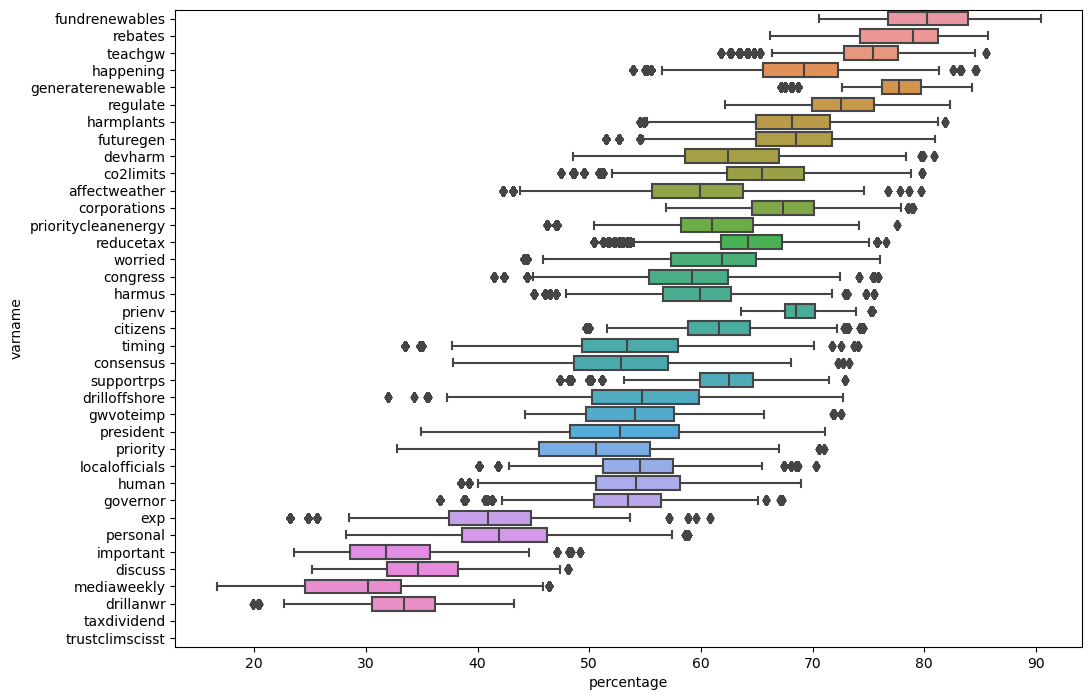

In [16]:
plt_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=plt_dims)

sns.boxplot(pro_opinion, y = "varname", x = "percentage", ax = ax)

By analyzing boxplots of questions we get a view of the distribution of the percent response agreement over the years. We can also visualize the relation between questions with the following plot:

<Axes: xlabel='percentage', ylabel='varname'>

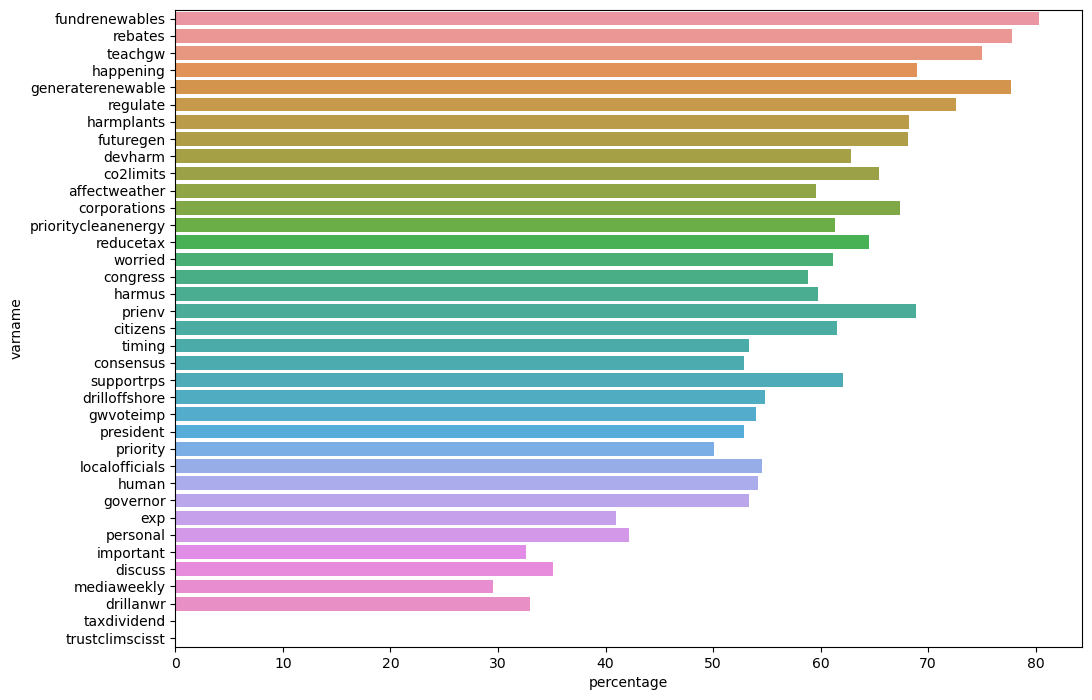

In [17]:
plt_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=plt_dims)

(sns.barplot( 
    pro_opinion,
    x = 'percentage', 
    y = 'varname',
    orient = 'h',
    errorbar = None,
    ax = ax)
)

By looking at the barplot of the percentages in support for each statement, we obtain an overview of which questions had the most support over the years. We can look into these individually.

<Axes: xlabel='YEAR', ylabel='percentage'>

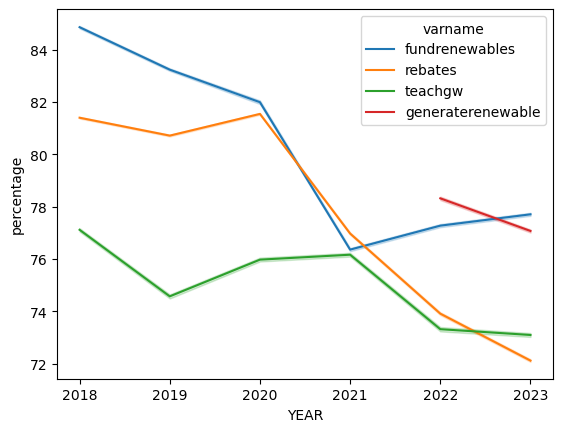

In [18]:
top_pro = pro_opinion.query("varname in ['fundrenewables', 'rebates', 'generaterenewable', 'teachgw']")
sns.lineplot(top_pro, x = "YEAR", y = "percentage", hue = "varname")

Although these question receieved the highest percentage of agreement, it seems as though overtime the percent of people in agreement has generally declined for all top 4 questions with the exception of `fundrenewables`.

What about the least supported questions?

<Axes: xlabel='YEAR', ylabel='percentage'>

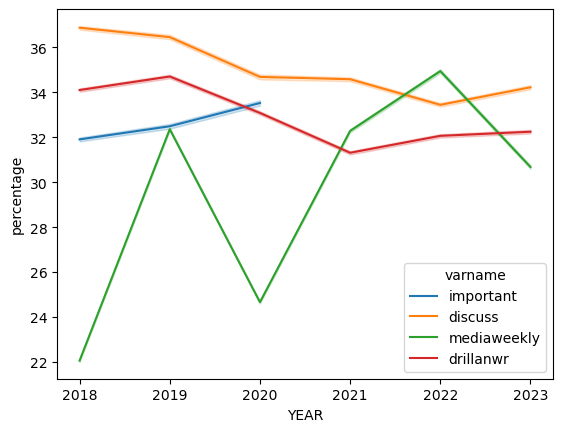

In [19]:
least_pro = pro_opinion.query("varname in ['mediaweekly', 'important', 'drillanwr', 'discuss']")
sns.lineplot(least_pro, x = "YEAR", y = "percentage", hue = "varname")

Analyzing the plot it seems as though the overall trend of the least supported statements generally remain almost stagnant with the exception of `important`.

Perhaps the  percent trends in responses to these questions overtime differs between the type of question asked. Within the surveyed data, questions can be broken down into the categories of Beliefs, Risk Perceptions, Policy Support, Who Should Act, and Behaviors. 

In [20]:
# categories = {
#     'Beliefs': ['happening','happeningOppose', 'human', 'humanOppose', 'affectweather',
#                 'affectweatherOppose', 'exp', 'expOppose'] ,
#     'Risk Perceptions':['worried', 'worriedOppose','harmplants', 'harmplantsOppose', 
#                         'futuregen', 'futuregenOppose', 'devharm', 'devharmOppose', 'harmus','harmusOppose'
#                        'personal', 'personalOppose'],
#     'Policy Support':[],
#     'Who Should Act':[],
#     'Behaviors':[] 
# }
# categorize_questions = lambda x : 

### Trends in Extreme Weather

To get an overivew extreme weather, we can first analyze the proportional occurence of each type of extreme weather over the stated time period.

In [21]:
event_occur = events_df_merged.groupby(["YEAR", "EVENT_TYPE"]).agg(event_count=('STATE', 'count')).reset_index()

In [22]:
event_occur.head()

,YEAR,EVENT_TYPE,event_count
0,2018,Astronomical Low Tide,730
1,2018,Avalanche,584
2,2018,Blizzard,5621
3,2018,Coastal Flood,4745
4,2018,Cold/Wind Chill,5183


<Axes: xlabel='event_count', ylabel='EVENT_TYPE'>

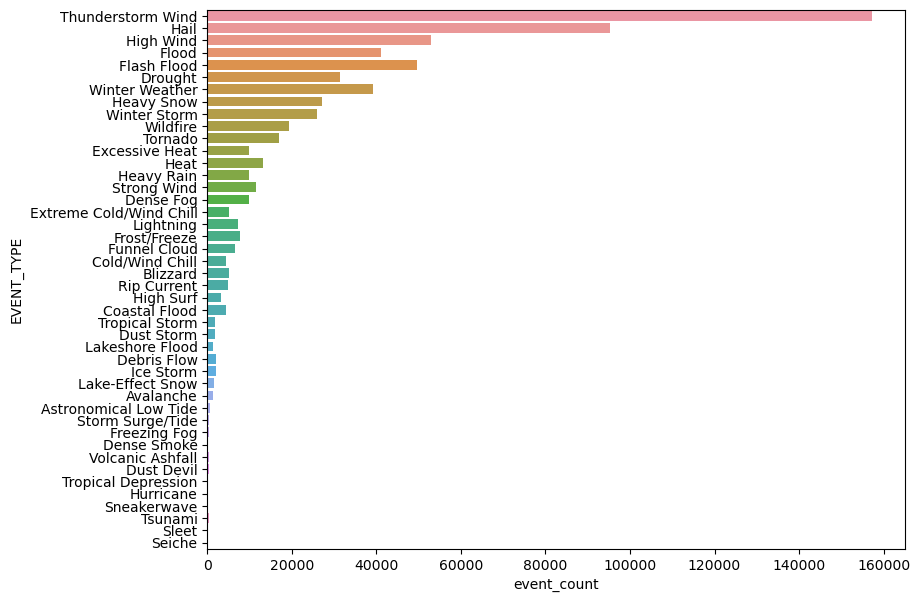

In [23]:
plt_dims = (9, 7)
fig, ax = plt.subplots(figsize=plt_dims)

(sns.barplot(
    event_occur.sort_values("event_count", ascending = False), 
    y = "EVENT_TYPE", 
    x = "event_count",
    orient = "h", 
    errorbar = None, 
    ax = ax)
)

From the plot it looks like the occurence of thunderstorm wind was the most prevelant across the defined time frame, with a large difference between the frequency of thunderstorm wind to other types of extreme weather events. 

Lets re-evaluate the frequency of extreme of the top 5 event types.

<Axes: xlabel='EVENT_TYPE', ylabel='event_count'>

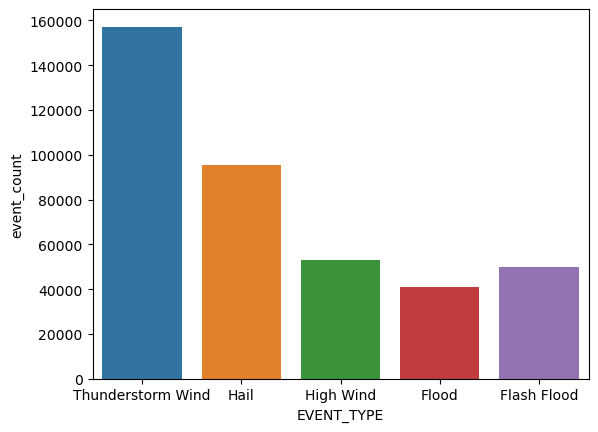

In [24]:
top_events = (
    event_occur
    .query("EVENT_TYPE in ['Thunderstorm Wind', 'Hail', 'High Wind', 'Flash Flood', 'Flood']")
    .sort_values("event_count", ascending = False)
)

(sns.barplot(
    top_events, 
    x = "EVENT_TYPE", 
    y = "event_count",
    errorbar = None)
)

Just from plotting the frequency of events, it seems as if the difference between the occurence of `Thunderstorm Wind` might be significantly different than the frequency of other events.

In a similar manner let us investigate the 5 least frequent events overtime. 

<Axes: xlabel='EVENT_TYPE', ylabel='event_count'>

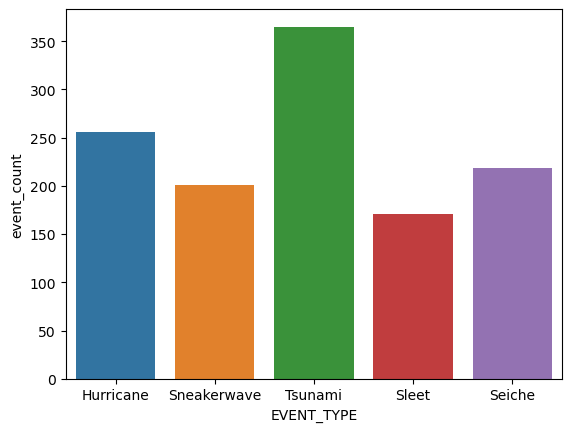

In [25]:
top_events = (
    event_occur
    .query("EVENT_TYPE in ['Seiche', 'Sleet', 'Tsunami', 'Sneakerwave', 'Hurricane']")
    .sort_values("event_count", ascending = False)
)

(sns.barplot(
    top_events, 
    x = "EVENT_TYPE", 
    y = "event_count",
    errorbar = None)
)

It seems as though `Sleet` is the least frequent weather event, although there is not extremely large differences between the frequencies of the least occuring events.

To further understand the frequency of events, we can look at any trends over time. To do this we will look at the proportions of events per year.

In [26]:
#proportion of events per year 
year_props = events_df_merged.groupby(["YEAR"])[['EVENT_TYPE']].value_counts(normalize=True).reset_index()

Reevaluating the distribution of extreme weather events as percentages we can analyze the shape of the data for each weather event.

<Axes: xlabel='proportion', ylabel='EVENT_TYPE'>

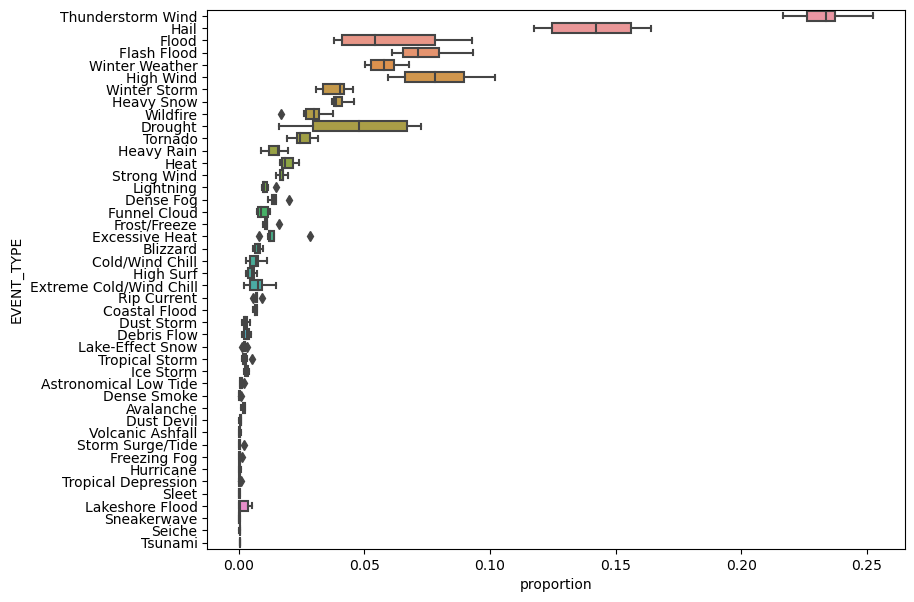

In [27]:
plt_dims = (9, 7)
fig, ax = plt.subplots(figsize=plt_dims)

sns.boxplot(year_props, x = "proportion", y = "EVENT_TYPE", ax = ax)

In [28]:
#plot of proportion of events faceted for each year

We can more closely analyze changes in the top occuring weather events. 

<Axes: xlabel='YEAR', ylabel='proportion'>

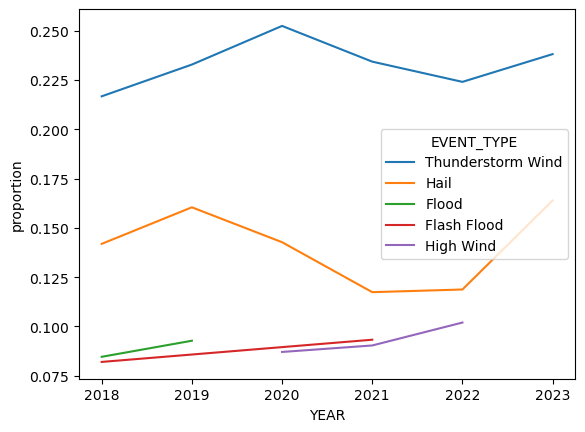

In [29]:
top_events = year_props.query("proportion > 0.08")
sns.lineplot(top_events, x = "YEAR", y = "proportion", hue = "EVENT_TYPE" )

In the same manner we can analyze the behavior of the least occuring extreme weather events over time. 

<Axes: xlabel='YEAR', ylabel='proportion'>

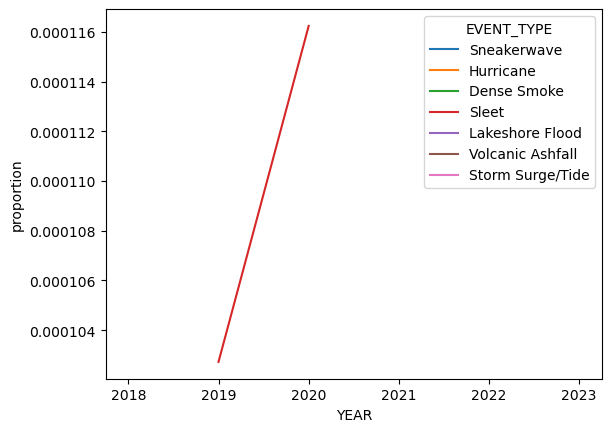

In [30]:
top_events = year_props.query("proportion < 0.00020")
sns.lineplot(top_events, x = "YEAR", y = "proportion", hue = "EVENT_TYPE" )

> **NOTE**
>
>**?? do some of the events in the dataset have a frequency of zero?? that wouldnt make sense(only if nan)**

### Correlation 

Is there a relationship between the frequency of extreme weather events, and the percentage of positive responses to statements within questions?

In [31]:
pro_count = event_count_merged.query(f'varname in {pro_responses}')

In [32]:
pro_count.head()

,STATE,COUNT,YEAR,varname,percentage
0,ALABAMA,149,2018,affectweather,52.66
2,ALABAMA,149,2018,citizens,58.85
4,ALABAMA,149,2018,co2limits,64.61
6,ALABAMA,149,2018,congress,57.94
8,ALABAMA,149,2018,consensus,42.21


<Axes: xlabel='COUNT', ylabel='percentage'>

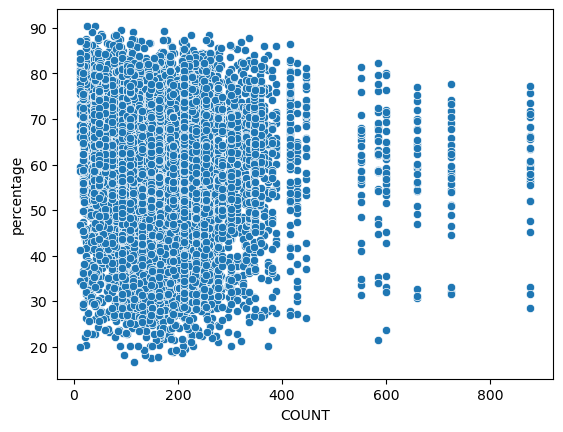

In [33]:
sns.scatterplot(pro_count, x = "COUNT", y = "percentage")

Vertical stripes of scatterplot might entail certian categorical variables significantly shape percent responses and frequency of extreme weather events. 

In [34]:
#scatter plot of extreme weather event and proportion that believes in climate change

<br><br>

# Analysis

> What (if any) analyses have already been performed on this data (or another similar dataset)?<br>
> You should provide references to this<br>
> What types of analyses did you perform?

In [35]:
...

Ellipsis

# Discussion and Conclusion

> How do you interpret the results from these analyses?
> What are some potential limitations and shortcoming of your analyses?